## Initial Information About the Dataset.

In [20]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
## importing the dataset 
df = pd.read_excel('online_retail_II.xlsx', sheet_name = ["Year 2009-2010", "Year 2010-2011"])



In [58]:
df1= df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [59]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [61]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [63]:
data= pd.concat([df1, df2], ignore_index=True)

In [64]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


## Finding the null Values

In [66]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [67]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [69]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [70]:
data[data["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [71]:
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [72]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [73]:
## Creating the new column TotalPrice = Quantity * Price for tracking the total price of each item
data["TotalPrice"] = data["Quantity"] * data["Price"]

In [74]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [76]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [79]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [80]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

C:\Users\Aftab\AppData\Local\Temp\ipykernel_2340\2718182163.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)


Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

### **INITIAL EDA INSIGHTS:**

1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 44876 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6) When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

C:\Users\Aftab\AppData\Local\Temp\ipykernel_2340\2037322964.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(x = data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10).index,
C:\Users\Aftab\AppData\Local\Temp\ipykernel_2340\2037322964.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10).values)


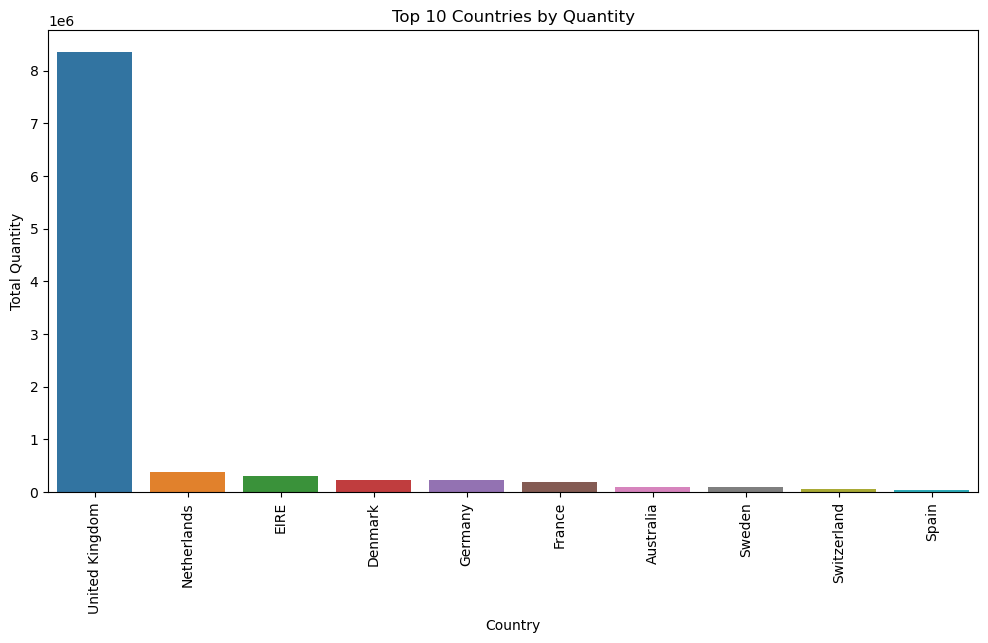

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x = data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10).index,
            y = data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10).values)
plt.xticks(rotation=90) 
plt.title("Top 10 Countries by Quantity")
plt.xlabel("Country")
plt.ylabel("Total Quantity")
plt.show()

In [96]:
countries = data["Country"].unique()

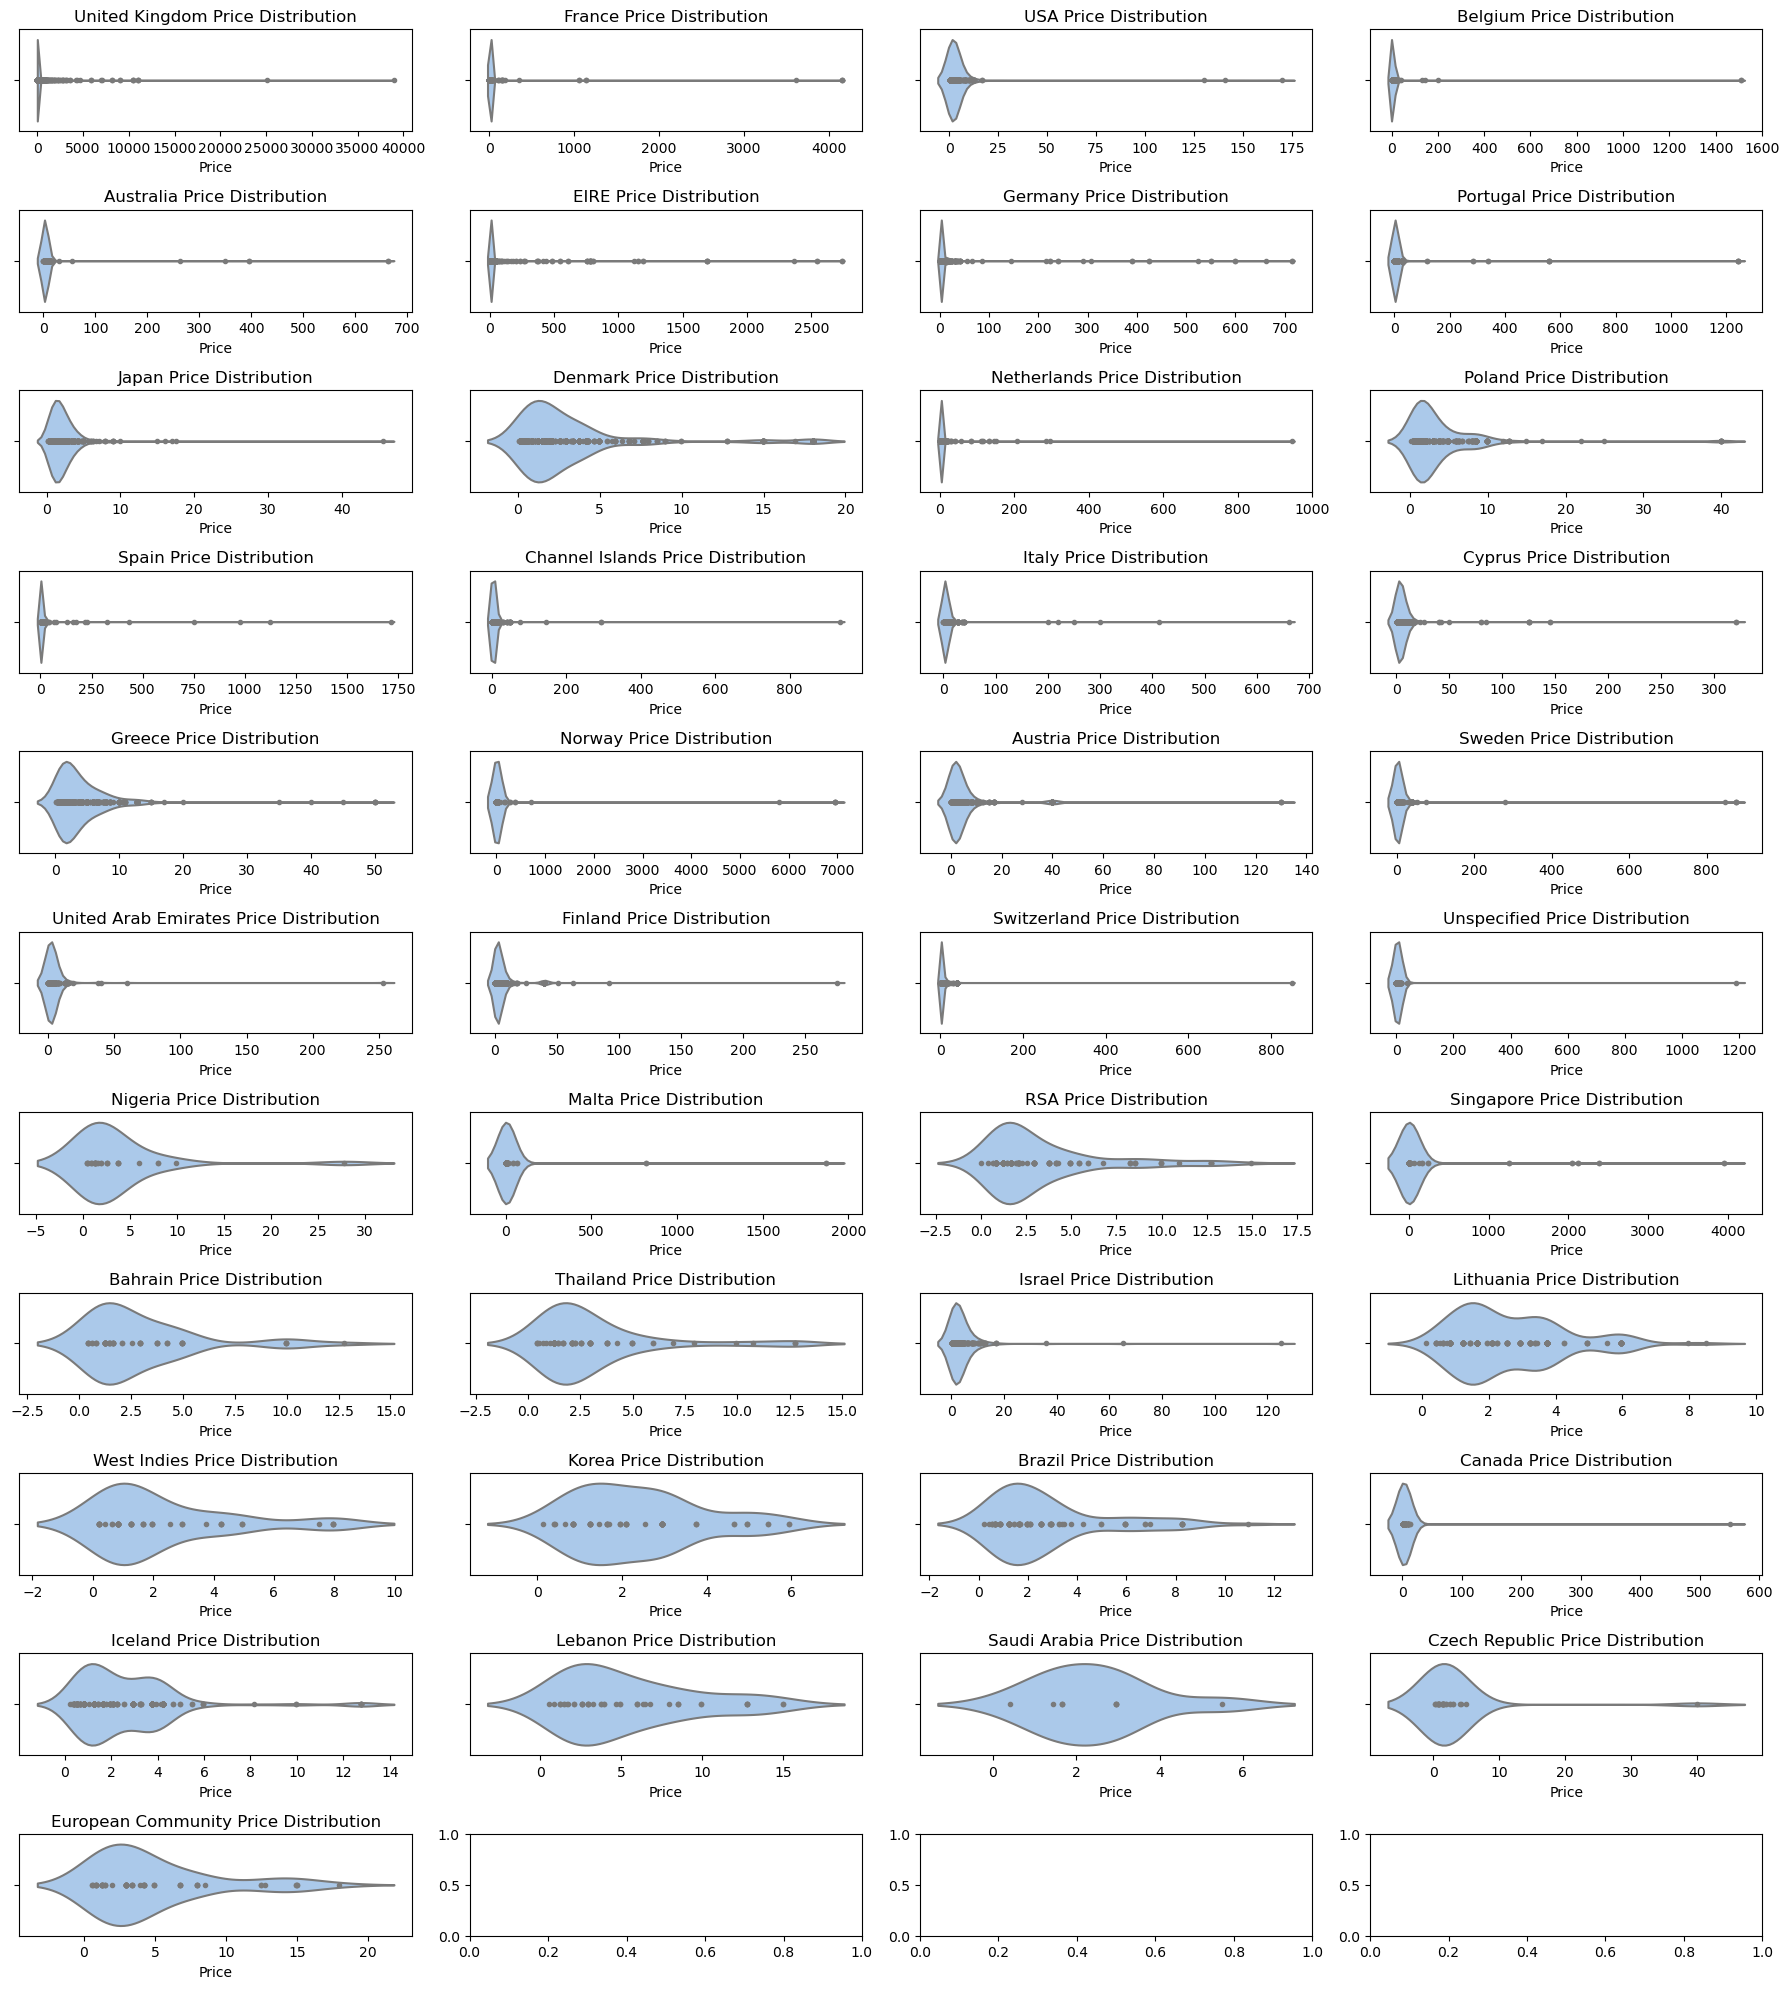

In [97]:

fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [105]:
temp_data = data.copy()

In [106]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [107]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [108]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 

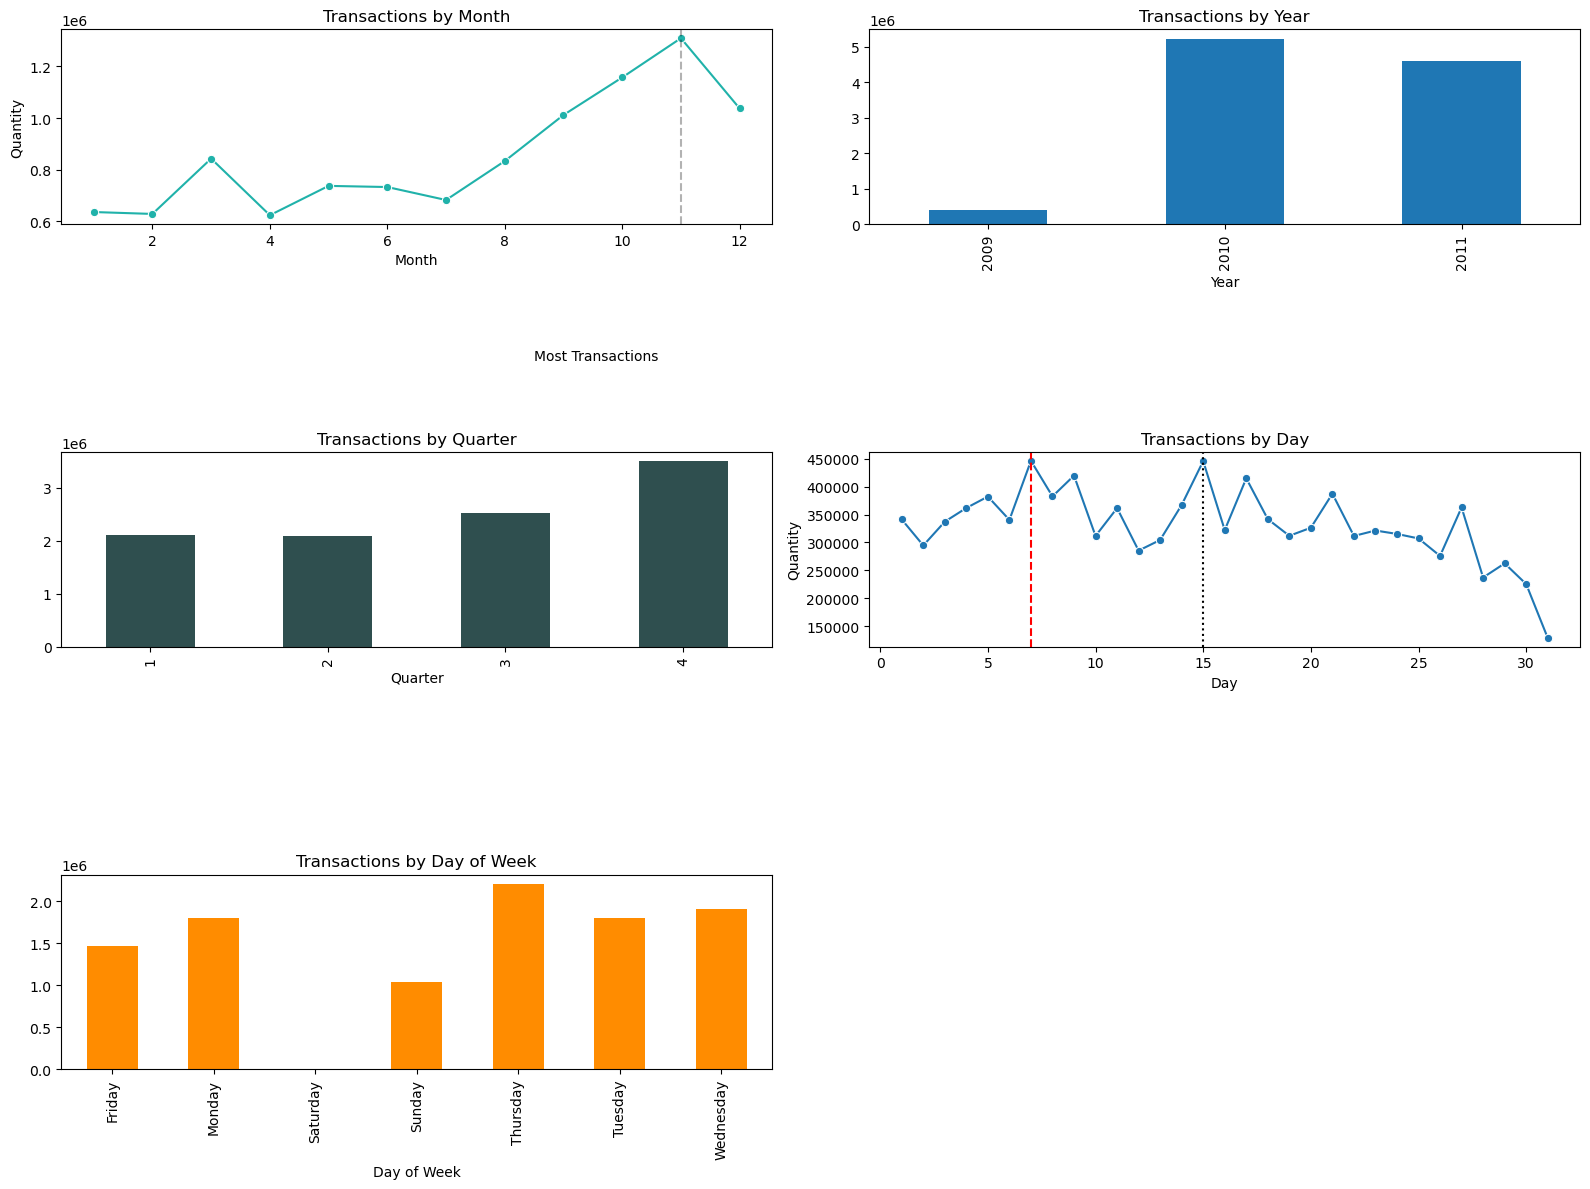

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))

# Plot 1: Transactions by Month
plt.subplot(3,2,1)
sns.lineplot(
    x="Month",
    y="Quantity",
    data=temp_data.groupby("Month")["Quantity"].sum().reset_index(),
    marker="o",
    color="lightseagreen"
)
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.5, temp_data["Quantity"].max() * 0.8, "Most Transactions")
plt.title("Transactions by Month")

# Plot 2: Transactions by Year
plt.subplot(3,2,2)
temp_data.groupby("Year")["Quantity"].sum().plot(kind="bar")
plt.title("Transactions by Year")

# Plot 3: Transactions by Quarter
plt.subplot(3,2,3)
temp_data.groupby("Quarter")["Quantity"].sum().plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")

# Plot 4: Transactions by Day
plt.subplot(3,2,4)
sns.lineplot(
    x="Day",
    y="Quantity",
    data=temp_data.groupby("Day")["Quantity"].sum().reset_index(),
    marker="o"
)
plt.axvline(7, color='r', linestyle='--')
plt.axvline(15, color='k', linestyle="dotted")
plt.title("Transactions by Day")

# Plot 5: Transactions by Day of Week
plt.subplot(3,2,5)
temp_data.groupby("Day of Week")["Quantity"].sum().plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")

plt.tight_layout()
plt.show()


## Dropping the Null Values of Customer ID with inplace as true , and making its datatype as Integer 

In [88]:
data.dropna(subset=['Customer ID'], inplace=True)
data['Customer ID'] = data['Customer ID'].astype(int)

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Creating a snapshot date for the analysis
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

clv_df = data.groupby('Customer ID').agg({
    'InvoiceDate': [
        lambda x: (snapshot_date - x.max()).days,   # Recency
        lambda x: (x.max() - x.min()).days          # Tenure
    ],
    'Invoice': 'nunique',                           # Frequency
    'TotalPrice': 'sum'                             # Monetary
})


In [ ]:
clv_df.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']
clv_df['AvgOrderValue'] = clv_df['Monetary'] / clv_df['Frequency']

# Target: Customer Lifetime Value = Frequency * AvgOrderValue
clv_df['CLV'] = clv_df['Frequency'] * clv_df['AvgOrderValue']

In [110]:
clv_df['RevenuePerDay'] = clv_df['Monetary'] / (clv_df['Tenure'] + 1)
clv_df['FrequencyPerTenure'] = clv_df['Frequency'] / (clv_df['Tenure'] + 1)
clv_df['AvgRevenuePerDay'] = clv_df['AvgOrderValue'] / (clv_df['Recency'] + 1)


In [111]:


# Feature set
X = clv_df[['Recency', 'Tenure', 'Frequency', 'AvgOrderValue',
            'RevenuePerDay', 'FrequencyPerTenure', 'AvgRevenuePerDay']]
# Target variable
y = clv_df['CLV']


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [93]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/150.0 MB 393.8 kB/s eta 0:06:21
   ---------------------------------------- 0.1/150.0 MB 726.2 kB/s eta 0:03:27
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:22
   ---------------------------------------- 0.3/150.0 MB 1.4 MB/s eta 0:01:47
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 0.6/150.0 MB 1.9 MB/s eta 0:01:18
   ---------------------------------------- 0.6/150.0 MB 1.9 MB/s eta 0:01:18
   ---------------------------------------- 1.0/150.0 MB 2.3 MB/s eta 0:01:07
   ---------------------------------------- 1.1/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 1.3/150.0 MB 2.4 MB/s eta 0:

In [113]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor    
# Define the models to be evaluated
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [114]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))


Random Forest
RMSE: 7524.333404470862
R² Score: 0.8421111590375538

Gradient Boosting
RMSE: 9456.131520252215
R² Score: 0.7506310465616528

XGBoost
RMSE: 12395.729342145003
R² Score: 0.5714913978630658


## Removing the null values.

In [54]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8492
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [55]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

KeyError: 'Year 2009-2010'